1.  K means clustering takes into consideration a centroid value of a given dataset
2.  centroids distances checked with all data points
3.  2 centroid - c1 , c2 ---- (d1,d2,d3,d4,d5,d6) , c1d1 = 4.56 , c2d1 = 5.96
4.  d1 entering c1 and centroid value of c1 is now changed
5.  c1d2 = 5.25 ,c2d2 = 1.29 
6.  d2 will enter c2 and centroid value of c2 will change
7.  euclidean distance is checked


In [37]:
import pandas as pd

In [38]:
df = pd.DataFrame(data = [[12,95],[10,86],[9,75],[11,98],[5,45],[6,59],[4,28]],columns=['Hours Studied','Marks'])

In [39]:
df.head()

,Hours Studied,Marks
0,12,95
1,10,86
2,9,75
3,11,98
4,5,45


In [40]:
#taking the centroid values randomly
c1 = df.iloc[0]
c2 = df.iloc[1]

In [41]:
c1.head()

Hours Studied    12
Marks            95
Name: 0, dtype: int64

In [42]:
c2.head()

Hours Studied    10
Marks            86
Name: 1, dtype: int64

In [43]:
#finding euclidean distance
import numpy as np
c1 = np.array([c1])
c2 = np.array([c2])

In [44]:
# datapoint selection
d1 = np.array([df.iloc[2]])

In [45]:
d1

array([[ 9, 75]], dtype=int64)

In [46]:
sum_sq_c1 = np.sum(np.square(d1-c1))
sum_sq_c2 = np.sum(np.square(d1-c2))
ed_c1d1 = np.sqrt(sum_sq_c1)
ed_c2d1 = np.sqrt(sum_sq_c2)
print(f"the euclidean distance between c1 and d1 is {ed_c1d1}")
print(f"the euclidean distance between c2 and d1 is {ed_c2d1}")


the euclidean distance between c1 and d1 is 20.223748416156685
the euclidean distance between c2 and d1 is 11.045361017187261


In [47]:
from sklearn.metrics.pairwise import euclidean_distances

In [48]:
ed_c1d1_sklearn = euclidean_distances(d1,c1)
ed_c2d1_sklearn = euclidean_distances(d1,c2)
print(f"the sklearn method euclidean distance between c1 and d1 is {ed_c1d1_sklearn}")
print(f"the sklearn method euclidean distance between c2 and d1 is {ed_c2d1_sklearn}")

the sklearn method euclidean distance between c1 and d1 is [[20.22374842]]
the sklearn method euclidean distance between c2 and d1 is [[11.04536102]]


In [49]:
c1

array([[12, 95]], dtype=int64)

In [50]:
c2

array([[10, 86]], dtype=int64)

In [51]:
d1

array([[ 9, 75]], dtype=int64)

In [52]:
# 10, 86 / 9,75 --- [9.5,80.5]
c2 = (c2+d1)/2
c2

array([[ 9.5, 80.5]])

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

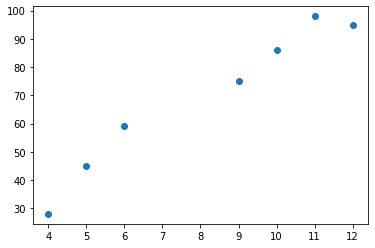

In [54]:
plt.scatter(df['Hours Studied'],df['Marks'])

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [56]:
df

array([[1.        , 0.95714286],
       [0.75      , 0.82857143],
       [0.625     , 0.67142857],
       [0.875     , 1.        ],
       [0.125     , 0.24285714],
       [0.25      , 0.44285714],
       [0.        , 0.        ]])

In [57]:
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [58]:
ypred = km.fit_predict(df)

d:\Anaconda\envs\github1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
ypred

array([0, 0, 0, 0, 1, 1, 1])

In [60]:
df = pd.DataFrame(df)

In [61]:
df['cluster'] = ypred

In [62]:
df

,0,1,cluster
0,1.000,0.957143,0
1,0.750,0.828571,0
2,0.625,0.671429,0
3,0.875,1.000000,0
4,0.125,0.242857,1
5,0.250,0.442857,1
6,0.000,0.000000,1


#### K Nearest Neighbors
manhattan , cosine similarity

In [66]:
from sklearn.datasets import load_iris
iris = load_iris()

In [67]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [68]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [69]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
xtrain,xtest,ytrain,ytest = train_test_split(iris['data'],iris['target'])

In [72]:
xtrain

array([[5.8, 2.7, 5.1, 1.9],
       [5.1, 3.4, 1.5, 0.2],
       [6.4, 3.1, 5.5, 1.8],
       [5.1, 3.5, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.3, 1.4, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [7.7, 3.8, 6.7, 2.2],
       [6.5, 3. , 5.2, 2. ],
       [7.4, 2.8, 6.1, 1.9],
       [5.7, 2.8, 4.1, 1.3],
       [4.9, 2.4, 3.3, 1. ],
       [5. , 2. , 3.5, 1. ],
       [5.7, 2.6, 3.5, 1. ],
       [6. , 3.4, 4.5, 1.6],
       [6. , 2.2, 5. , 1.5],
       [5. , 3.5, 1.3, 0.3],
       [4.9, 3.1, 1.5, 0.1],
       [6.1, 2.8, 4. , 1.3],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [5.9, 3. , 4.2, 1.5],
       [5.6, 3. , 4.1, 1.3],
       [4.9, 3. , 1.4, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [4.6, 3.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.2],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.4, 3.7, 1. ],
       [5.6, 3. , 4.5, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3. , 1.6, 0.2],
       [6.7, 3.3, 5.7, 2.5],
       [5.3, 3

In [73]:
xtest

array([[5. , 3.4, 1.6, 0.4],
       [5.6, 2.7, 4.2, 1.3],
       [6.7, 3.3, 5.7, 2.1],
       [6.4, 2.7, 5.3, 1.9],
       [6.7, 3.1, 4.7, 1.5],
       [5.1, 3.3, 1.7, 0.5],
       [5.7, 3. , 4.2, 1.2],
       [6.8, 2.8, 4.8, 1.4],
       [5.5, 2.4, 3.8, 1.1],
       [5.8, 2.7, 3.9, 1.2],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 2.3, 4.4, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.5, 2.3, 1.3, 0.3],
       [5.5, 2.6, 4.4, 1.2],
       [6.2, 3.4, 5.4, 2.3],
       [6. , 3. , 4.8, 1.8],
       [5.6, 2.9, 3.6, 1.3],
       [5.7, 2.9, 4.2, 1.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.3, 3.4, 5.6, 2.4],
       [6.2, 2.9, 4.3, 1.3],
       [4.4, 2.9, 1.4, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [7.7, 3. , 6.1, 2.3],
       [5. , 3.5, 1.6, 0.6],
       [6.1, 3. , 4.6, 1.4],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [5.1, 2.5, 3. , 1.1],
       [7. , 3.2, 4.7, 1.4],
       [6.3, 2.8, 5.1, 1.5],
       [5.4, 3.7, 1.5, 0.2],
       [5.2, 4

In [74]:
ytrain

array([2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2,
       2, 1, 0, 0, 1, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 1, 1,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 0, 0, 2, 1, 0, 1, 2,
       1, 1])

In [75]:
ytest

array([0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2,
       1, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0])

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn = KNeighborsClassifier()


In [78]:
    knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [80]:
ypred = knn.predict(xtest)

In [82]:
ypred

array([0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2,
       1, 0, 2, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [83]:
knn.score(xtest,ytest)

0.9736842105263158

1.  Linear relationship between input and output
2.  No Multi colinearity
3.  Normality of residuals  